 👮🏻‍♂️ File already exists. Do not overwrite: /Users/m219063/data/noaa-goes16/ABI-L2-MCMIPF/2024/226/14/OR_ABI-L2-MCMIPF-M6_G16_s20242261410207_e20242261419522_c20242261420014.nc
📦 Finished downloading [1] files to [/Users/m219063/data/noaa-goes16/ABI-L2-MCMIPF].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

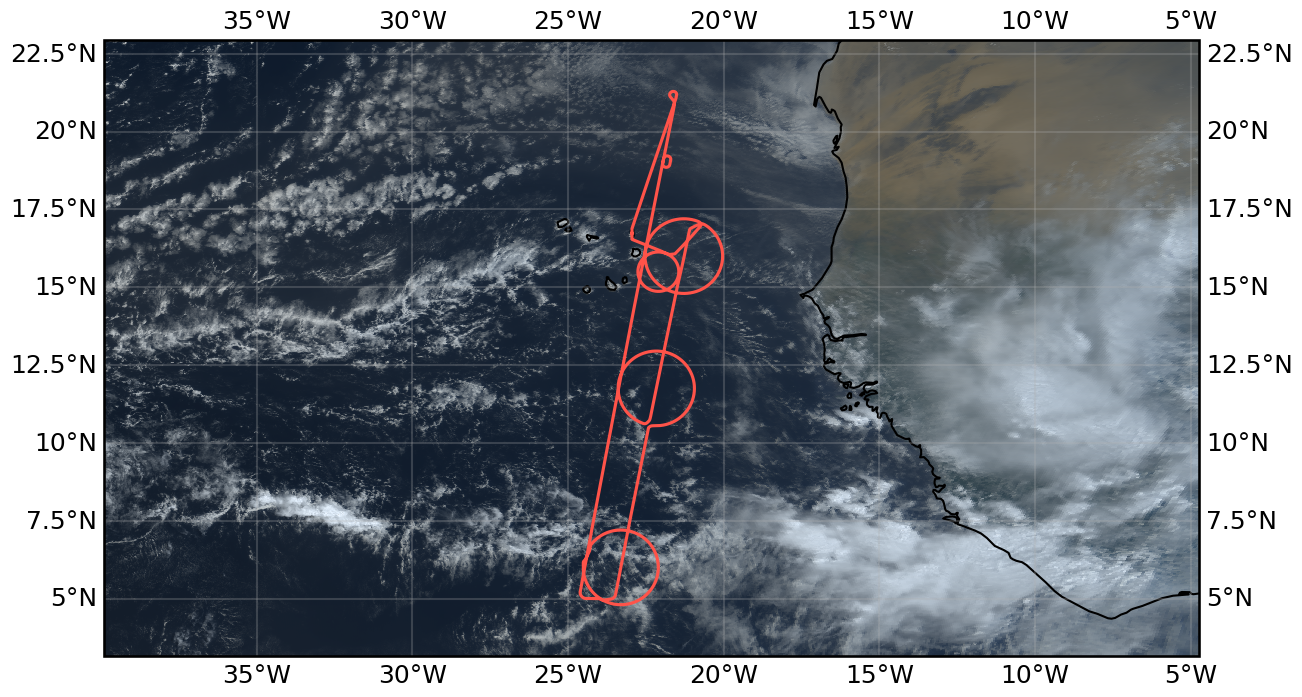

In [3]:
from orcestra.flightplan import  LatLon, path_preview
from orcestra.weathermaps import goes_overlay
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import xarray as xr

sns.set_context("talk")

flight_name = 'HALO-20240813a'
flight_date = flight_name[5:9]+'-'+flight_name[9:11]+'-'+flight_name[11:13]
tracks = xr.open_dataset('/Volumes/ORCESTRA/'+flight_name+'/bahamas/QL_'+flight_name+'_BAHAMAS_V01.nc')
path   = LatLon(lat=tracks['IRS_LAT'], lon=tracks['IRS_LON'], label=flight_name)

fig, ax = plt.subplots(
    figsize=(15, 8),
    facecolor='white',
    subplot_kw  ={"projection": ccrs.PlateCarree()}
)

path_preview(path,ax=ax,show_waypoints=False,color='#FF5349')

# this can take some time depending on the network.  The downloaded image is cached, but the first time it can
# take 15 min to download.  Thereafter the fetching and plotting of the cached data takes about 1 min
#
goes_overlay(flight_date+'T14:15',ax)
#fig.savefig(flight_name+'-track.png',bbox_inches='tight')

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


 👮🏻‍♂️ File already exists. Do not overwrite: /Users/m219063/data/noaa-goes16/ABI-L2-MCMIPF/2024/224/16/OR_ABI-L2-MCMIPF-M6_G16_s20242241600207_e20242241609520_c20242241610009.nc
📦 Finished downloading [1] files to [/Users/m219063/data/noaa-goes16/ABI-L2-MCMIPF].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

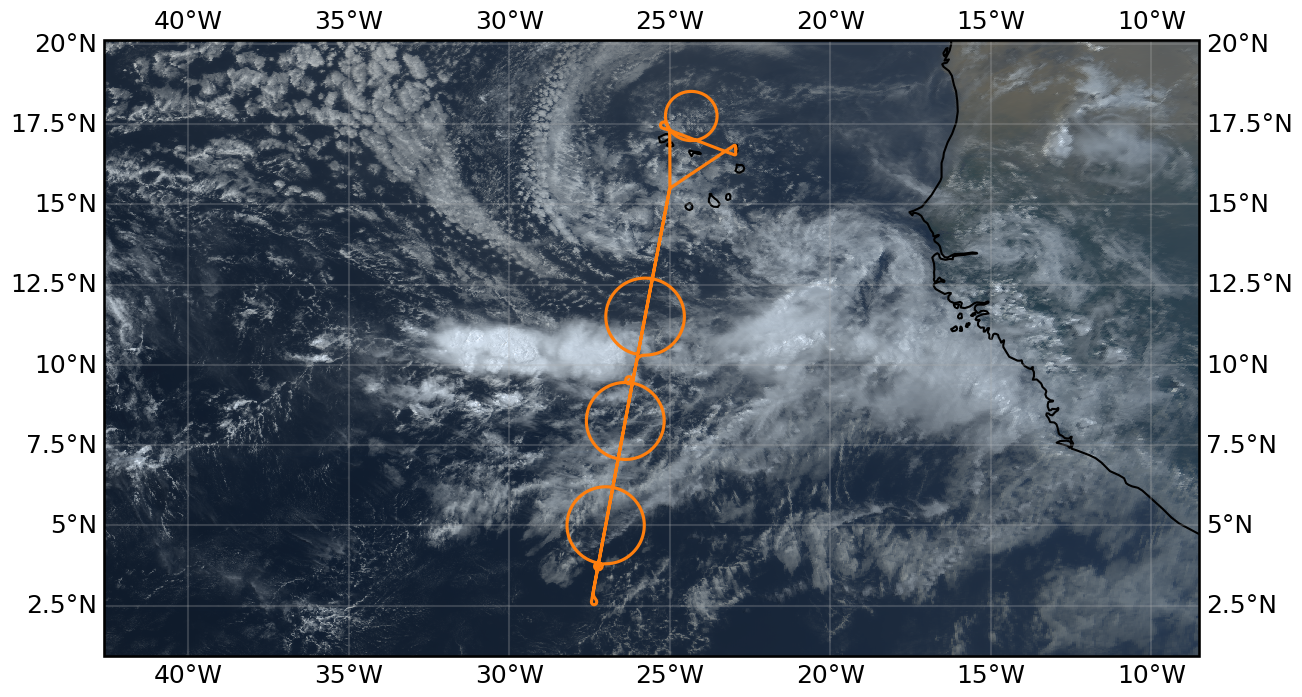

In [ ]:
fig, ax = plt.subplots(
    figsize=(15, 8),
    facecolor='white',
    subplot_kw  ={"projection": ccrs.PlateCarree()}
)
path_preview(path,ax=ax)#,show_waypoints=False,color='#FF5349')
goes_overlay(flight_date+'T16:00',ax)
fig.savefig(flight_name+'-track.png',bbox_inches='tight')

In [ ]:
False,color='#FF5349')
ax.imshow(goes, transform=g2g_0811_16utc.rgb.crs, regrid_shape=3500,
              interpolation='nearest') 
fig.savefig(flight_name+'-track.png',bbox_inches='tight')

SyntaxError: unmatched ')' (1393416523.py, line 1)